In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import string

In [2]:
# Download NLTK data (only required once)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...


True

In [3]:
# Load the dataset
categories = ['sci.space', 'comp.graphics', 'talk.politics.guns', 'rec.sport.baseball', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\3698852670.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=newsgroups.target, palette=color_palette, ax=ax1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\3698852670.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette=color_palette, ax=ax3)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\3698852670.py:55: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette=color_palette, ax=ax3)


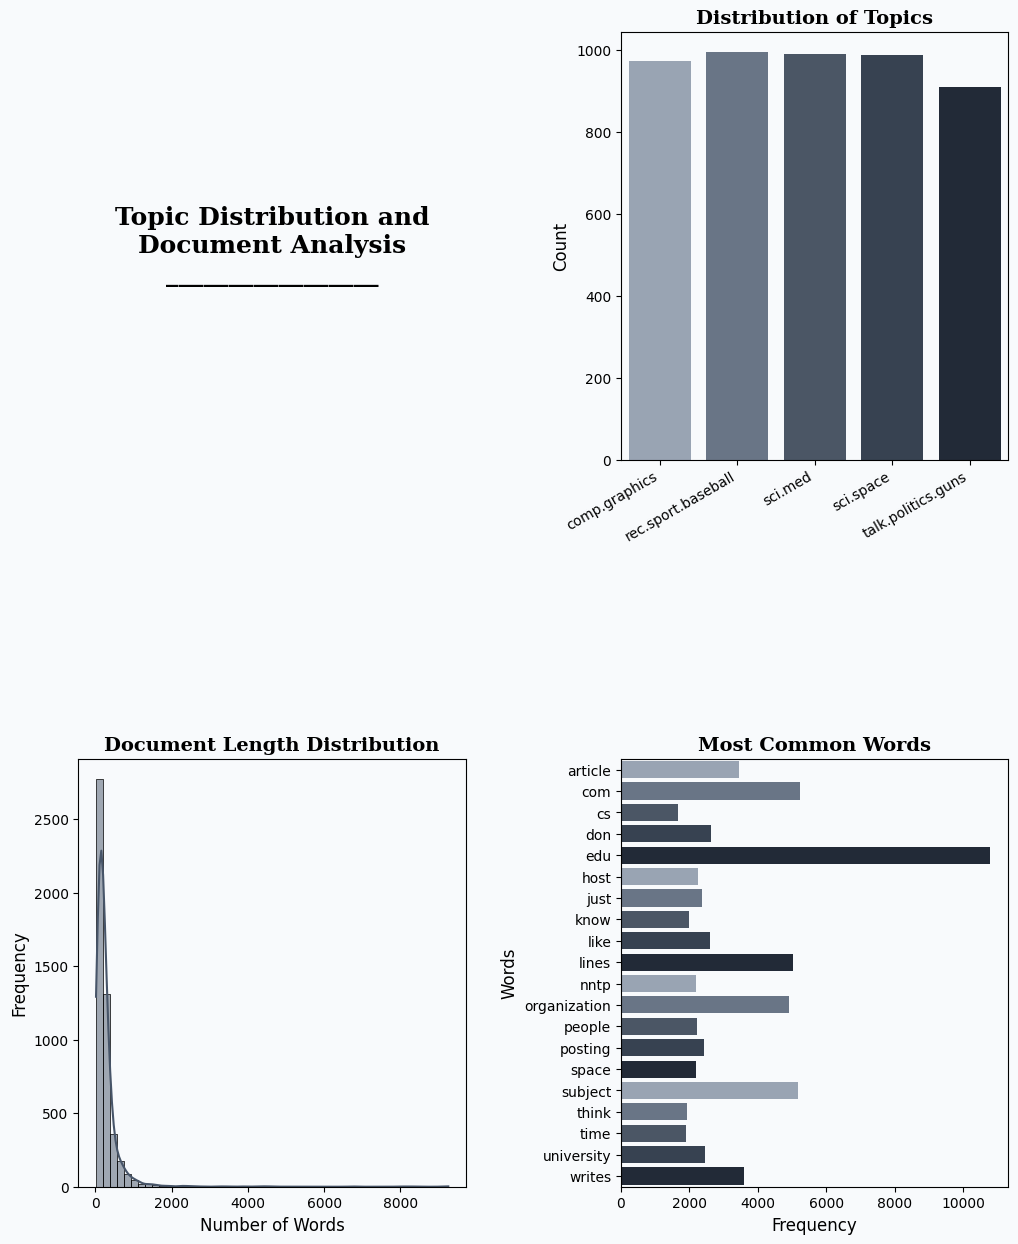

In [22]:
# Figure adjustments
fig = plt.figure(figsize=(12, 15))  # Larger size for better visualization
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.4, hspace=0.7)  # Increases space between subplots

# Background and color settings
background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Topic Distribution and\nDocument Analysis\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot 1: Distribution of Topics
ax1 = axes[1]
ax1.set_title("Distribution of Topics", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
sns.countplot(x=newsgroups.target, palette=color_palette, ax=ax1)
ax1.set_xticks(np.arange(len(categories)))
ax1.set_xticklabels(newsgroups.target_names, rotation=30, ha='right', fontsize=10)
ax1.set_xlabel("")
ax1.set_ylabel("Count", fontsize=12)

# Plot 2: Document Length Distribution
ax2 = axes[2]
ax2.set_title("Document Length Distribution", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
doc_lengths = [len(doc.split()) for doc in newsgroups.data]
sns.histplot(doc_lengths, bins=50, kde=True, color=color_palette[2], ax=ax2)
ax2.set_xlabel("Number of Words", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

# Plot 3: Most Common Words (Optional)
from sklearn.feature_extraction.text import CountVectorizer

ax3 = axes[3]
ax3.set_title("Most Common Words", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(newsgroups.data)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))
sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette=color_palette, ax=ax3)
ax3.set_xlabel("Frequency", fontsize=12)
ax3.set_ylabel("Words", fontsize=12)

# Adjust and show
plt.show()

In [7]:
# Advanced Text Preprocessing
# Define a function to clean and lemmatize text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the dataset
preprocessed_data = [preprocess_text(doc) for doc in newsgroups.data]

In [8]:
# Feature Extraction with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1, 2))
X = vectorizer.fit_transform(preprocessed_data)
y = newsgroups.target

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Compare Multiple Models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Naive Bayes Accuracy: 0.9808
SVM Accuracy: 0.9787
Random Forest Accuracy: 0.9238
Logistic Regression Accuracy: 0.9780


In [17]:
# Hyperparameter Tuning with Grid Search (Example: SVM)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f"Best SVM Parameters: {grid_search.best_params_}")

Best SVM Parameters: {'C': 10, 'kernel': 'linear'}


In [18]:
# Cross-Validation
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Accuracy: 0.9794


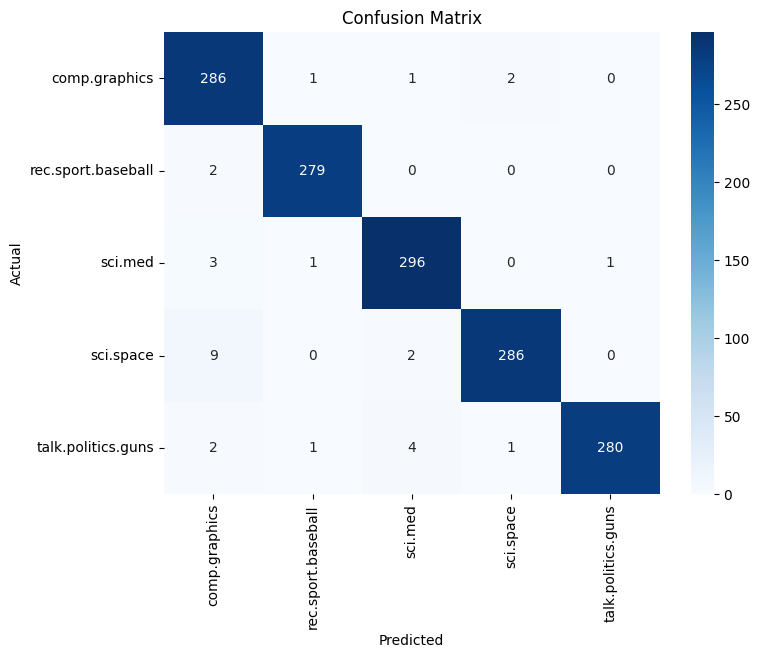

In [14]:
# Visualize Results
# Confusion Matrix for the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Save the Model
import joblib
joblib.dump(best_model, 'text_classification_model.pkl')

['text_classification_model.pkl']